In [1]:
!git clone https://github.com/WillKoehrsen/feature-selector

Cloning into 'feature-selector'...
remote: Enumerating objects: 118, done.
remote: Total 118 (delta 0), reused 0 (delta 0), pack-reused 118
Receiving objects: 100% (118/118), 5.05 MiB | 16.84 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [11]:
!ls

feature-selector  sample_data


In [2]:
%cd feature-selector/feature_selector
from feature_selector import FeatureSelector
%cd ../../

import pandas as pd

/content/feature-selector/feature_selector
/content


In [12]:
%cd feature-selector
train = pd.read_csv('data/credit_example.csv')
%cd ../
train_labels = train['TARGET']
train.head()

/content/feature-selector
/content


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,247408,0,Cash loans,F,Y,N,2,108000.0,172512.0,13477.5,144000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,-12665,-2719,-6816.0,-4365,7.0,1,1,0,1,0,0,Laborers,4.0,2,2,TUESDAY,16,0,0,0,0,0,0,...,0.1095,0.1323,0.0194,0.0729,reg oper account,block of flats,0.1484,"Stone, brick",No,1.0,1.0,1.0,1.0,-2622.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,153916,0,Revolving loans,F,Y,Y,2,135000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007274,-12748,-471,-747.0,-4880,17.0,1,1,0,1,0,0,Cooking staff,4.0,2,2,TUESDAY,10,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-520.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,229065,0,Cash loans,F,N,Y,0,112500.0,463500.0,20547.0,463500.0,Family,Pensioner,Secondary / secondary special,Widow,House / apartment,0.026392,-23441,365243,-14237.0,-4634,NaN,1,0,0,1,0,0,NaN,1.0,2,2,THURSDAY,11,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-1285.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,7.0
3,282013,0,Cash loans,F,N,Y,0,135000.0,549882.0,17739.0,459000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.019101,-22793,365243,-690.0,-4478,NaN,1,0,0,1,0,0,NaN,1.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,...,0.0445,0.0572,0.0233,0.0154,reg oper account,block of flats,0.0383,"Stone, brick",No,5.0,1.0,5.0,0.0,-177.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,142266,0,Cash loans,F,N,Y,0,90000.0,518562.0,20695.5,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.022625,-13829,-631,-4822.0,-1803,NaN,1,1,0,1,0,0,Sales staff,2.0,2,2,TUESDAY,12,0,0,0,0,0,0,...,NaN,0.0114,NaN,0.0000,NaN,block of flats,0.0088,Block,No,0.0,0.0,0.0,0.0,-718.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [13]:
train = train.drop(columns = ['TARGET'])

In [14]:
fs = FeatureSelector(data = train, labels = train_labels)

In [16]:
fs.identify_missing(missing_threshold=0.6)

17 features with greater than 0.60 missing values.



In [17]:
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                            early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[43]	valid_0's auc: 0.707223	valid_0's binary_logloss: 0.261261
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[91]	valid_0's auc: 0.765237	valid_0's binary_logloss: 0.247863
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[29]	valid_0's auc: 0.742592	valid_0's binary_logloss: 0.257432
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[57]	valid_0's auc: 0.748741	valid_0's binary_logloss: 0.257211
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[54]	valid_0's auc: 0.735657	valid_0's binary_logloss: 0.255561
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[43]	valid_0's auc: 0.725101	valid_0's binary_logloss: 0.2

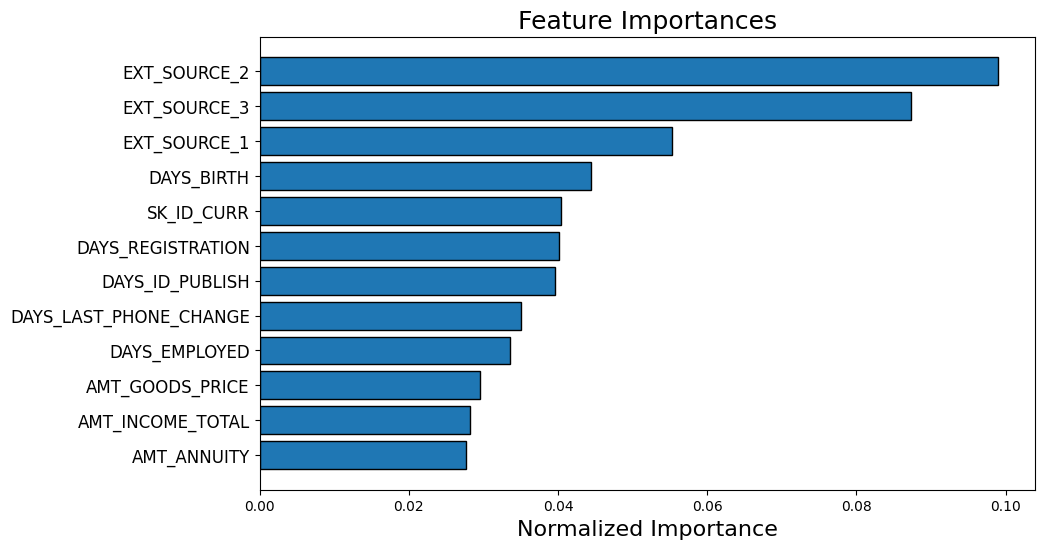

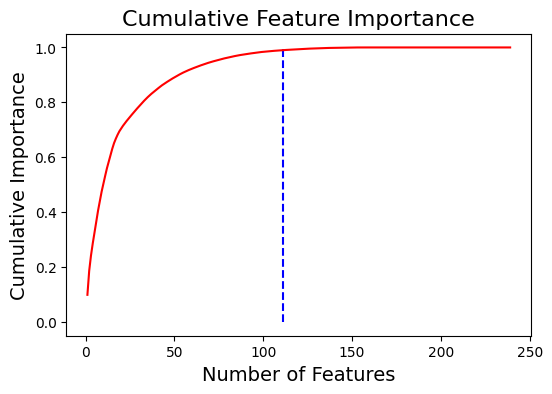

111 features required for 0.99 of cumulative importance


In [18]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [19]:
fs = FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

17 features with greater than 0.60 missing values.

4 features with a single unique value.

21 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[26]	valid_0's auc: 0.754633	valid_0's binary_logloss: 0.257962
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[67]	valid_0's auc: 0.760496	valid_0's binary_logloss: 0.249424
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.74929	valid_0's binary_logloss: 0.253233
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.741892	valid_0's binary_logloss: 0.255845
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[26]	valid_0's auc: 0.768653	valid_0's binary_logloss: 0.251826
Trai

In [20]:
train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 157 features.
